# Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import nibabel as nib
%matplotlib inline

In [2]:
mri_file = nib.load("../imgs/IXI662-Guys-1120-T1.nii.gz")
brain_mri_data = mri_file.get_fdata()

In [3]:
affine = mri_file.affine
shape = mri_file.shape

In [4]:
print(affine)
print(shape)

[[ 1.89821944e-02 -2.72075552e-03  1.19975281e+00 -9.06798553e+01]
 [-9.27821696e-01  1.32986516e-01  2.45456006e-02  1.02829445e+02]
 [ 1.33014351e-01  9.28015888e-01  5.71511449e-11 -1.14823784e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
(256, 256, 150)


In [5]:
mri_file.header.get_zooms()

(0.9375, 0.9375, 1.2000039)

In [6]:
nib.aff2axcodes(affine)

('P', 'S', 'R')

## Display Slices

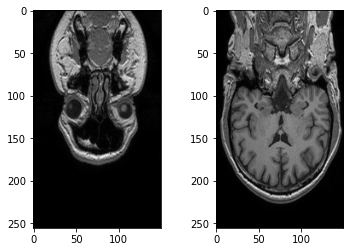

In [7]:
fig, axis = plt.subplots(1,2)
axis[0].imshow(brain_mri_data[40,:,:], cmap="gray")
axis[1].imshow(brain_mri_data[120,:,:], cmap="gray") 

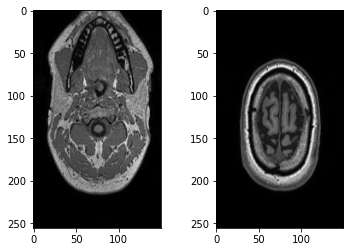

In [8]:
fig, axis = plt.subplots(1,2)
axis[0].imshow(brain_mri_data[:,30,:], cmap="gray")
axis[1].imshow(brain_mri_data[:,200,:], cmap="gray") 

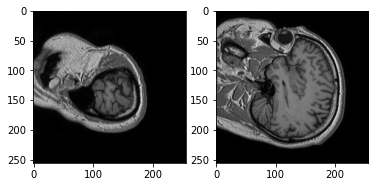

In [9]:
fig, axis = plt.subplots(1,2)
axis[0].imshow(brain_mri_data[:,:,20], cmap="gray")
axis[1].imshow(brain_mri_data[:,:,45], cmap="gray") 

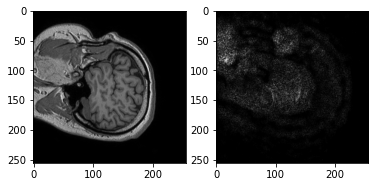

In [10]:
fig, axis = plt.subplots(1,2)
axis[0].imshow(brain_mri_data[:,:,32], cmap="gray")
axis[1].imshow(brain_mri_data[:,:,149], cmap="gray") 

## Transformation

In [11]:
voxel_coords = np.array((0,0,0,1))

In [12]:
voxel_coords

array([0, 0, 0, 1])

In [13]:
physical_coords = affine @ voxel_coords

In [14]:
physical_coords

array([ -90.67985535,  102.82944489, -114.82378387,    1.        ])

In [15]:
affine[:, 3:]

array([[ -90.67985535],
       [ 102.82944489],
       [-114.82378387],
       [   1.        ]])

In [16]:
voxel_coords_manual = np.array((0,0,0))
physical_coords_manual = affine[:3, :3] @ voxel_coords_manual
physical_coords_manual += affine[:3, 3]
physical_coords_manual 

array([ -90.67985535,  102.82944489, -114.82378387])

In [17]:
physical_coords = [ -90.67985535,  102.82944489, -114.82378387,    1.        ]
(np.linalg.inv(affine) @ physical_coords).round()

array([-0.,  0., -0.,  1.])

## Resampling

In [30]:
print(mri_file.shape)
print(mri_file.header.get_zooms())

(256, 256, 150)
(0.9375, 0.9375, 1.2000039)


In [31]:
import nibabel.processing

In [32]:
voxel_size = (2,2,2)
brain_mri_resized = nibabel.processing.conform(mri_file, (128,128,100), voxel_size, orientation="PSR")

In [36]:
brain_mri_resized_data = brain_mri_resized.get_fdata()

In [34]:
print(brain_mri_resized.shape)
print(brain_mri_resized.header.get_zooms())

(128, 128, 100)
(2.0, 2.0, 2.0)


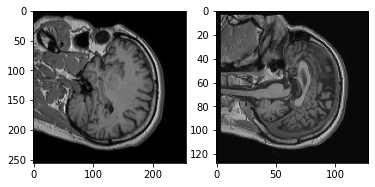

In [38]:
fig, axis = plt.subplots(1,2)
axis[0].imshow(brain_mri_data[:,:,50], cmap="gray")
axis[1].imshow(brain_mri_resized_data[:,:,50], cmap="gray")

## Normalization and Standardization

In [45]:
brain_mri_data_standardized = brain_mri_data / 1055

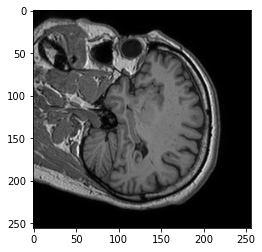

In [48]:
plt.figure()
plt.imshow(brain_mri_data_standardized[:,:,50], cmap="gray")

In [49]:
brain_mri_data_standardized.max()

1.0

In [50]:
brain_mri_data_standardized.min()

0.0

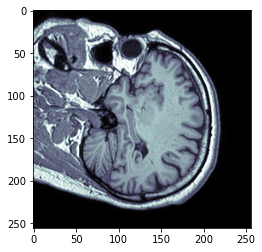

In [54]:
brain_mri_window = np.clip(brain_mri_data, -1000, 600)
plt.figure()
plt.imshow(brain_mri_window[:,:,50], cmap="bone")

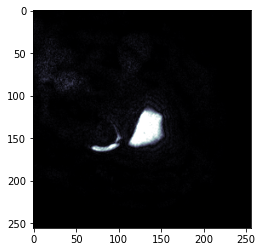

In [59]:
brain_mri_window = np.clip(brain_mri_data, -250, 250)
plt.figure()
plt.imshow(brain_mri_window[:,:,5 ], cmap="bone")

### Heart

In [60]:
cardiac_mri = nib.load("../imgs/la_003.nii.gz")

In [68]:
cardiac_mri.shape

(320, 320, 130)

In [61]:
cardiac_mri_data = cardiac_mri.get_fdata()

In [62]:
 mean, std = np.mean(cardiac_mri_data), np.std(cardiac_mri_data)

In [63]:
print(mean, std)

172.74059968449518 263.3350437349292


In [64]:
cardiac_mri_norm = (cardiac_mri_data - mean) / std
cardiac_mri_standardized = (cardiac_mri_norm - np.min(cardiac_mri_norm)) / (np.max(cardiac_mri_norm) - np.min(cardiac_mri_norm))

In [65]:
np.mean(cardiac_mri_standardized), np.min(cardiac_mri_standardized), np.max(cardiac_mri_standardized)

(0.08641350659554545, 0.0, 1.0)

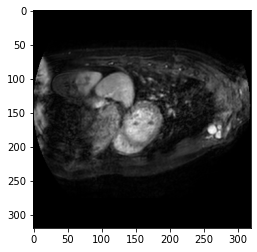

In [67]:
plt.figure()
plt.imshow(cardiac_mri_standardized[:,:,30], cmap="gray")